# Predicción de diabetes

La base de datos se extrajo de: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df = df.sample(frac=0.1, random_state=42)

### Preprocesamiento y análisis

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.493240,0.073700,0.036600,27.315612,5.535860,138.175900,0.086300
std,22.582342,0.261295,0.187787,6.751715,1.072052,40.362503,0.280821
min,0.080000,0.000000,0.000000,10.190000,3.500000,80.000000,0.000000
25%,23.000000,0.000000,0.000000,23.560000,4.800000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.560000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

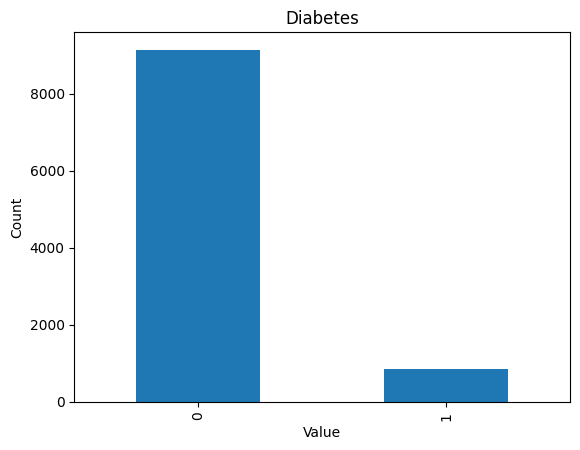

In [7]:
counts = df['diabetes'].value_counts()
counts.plot(kind='bar')
plt.title('Diabetes')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_16889/219352380.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


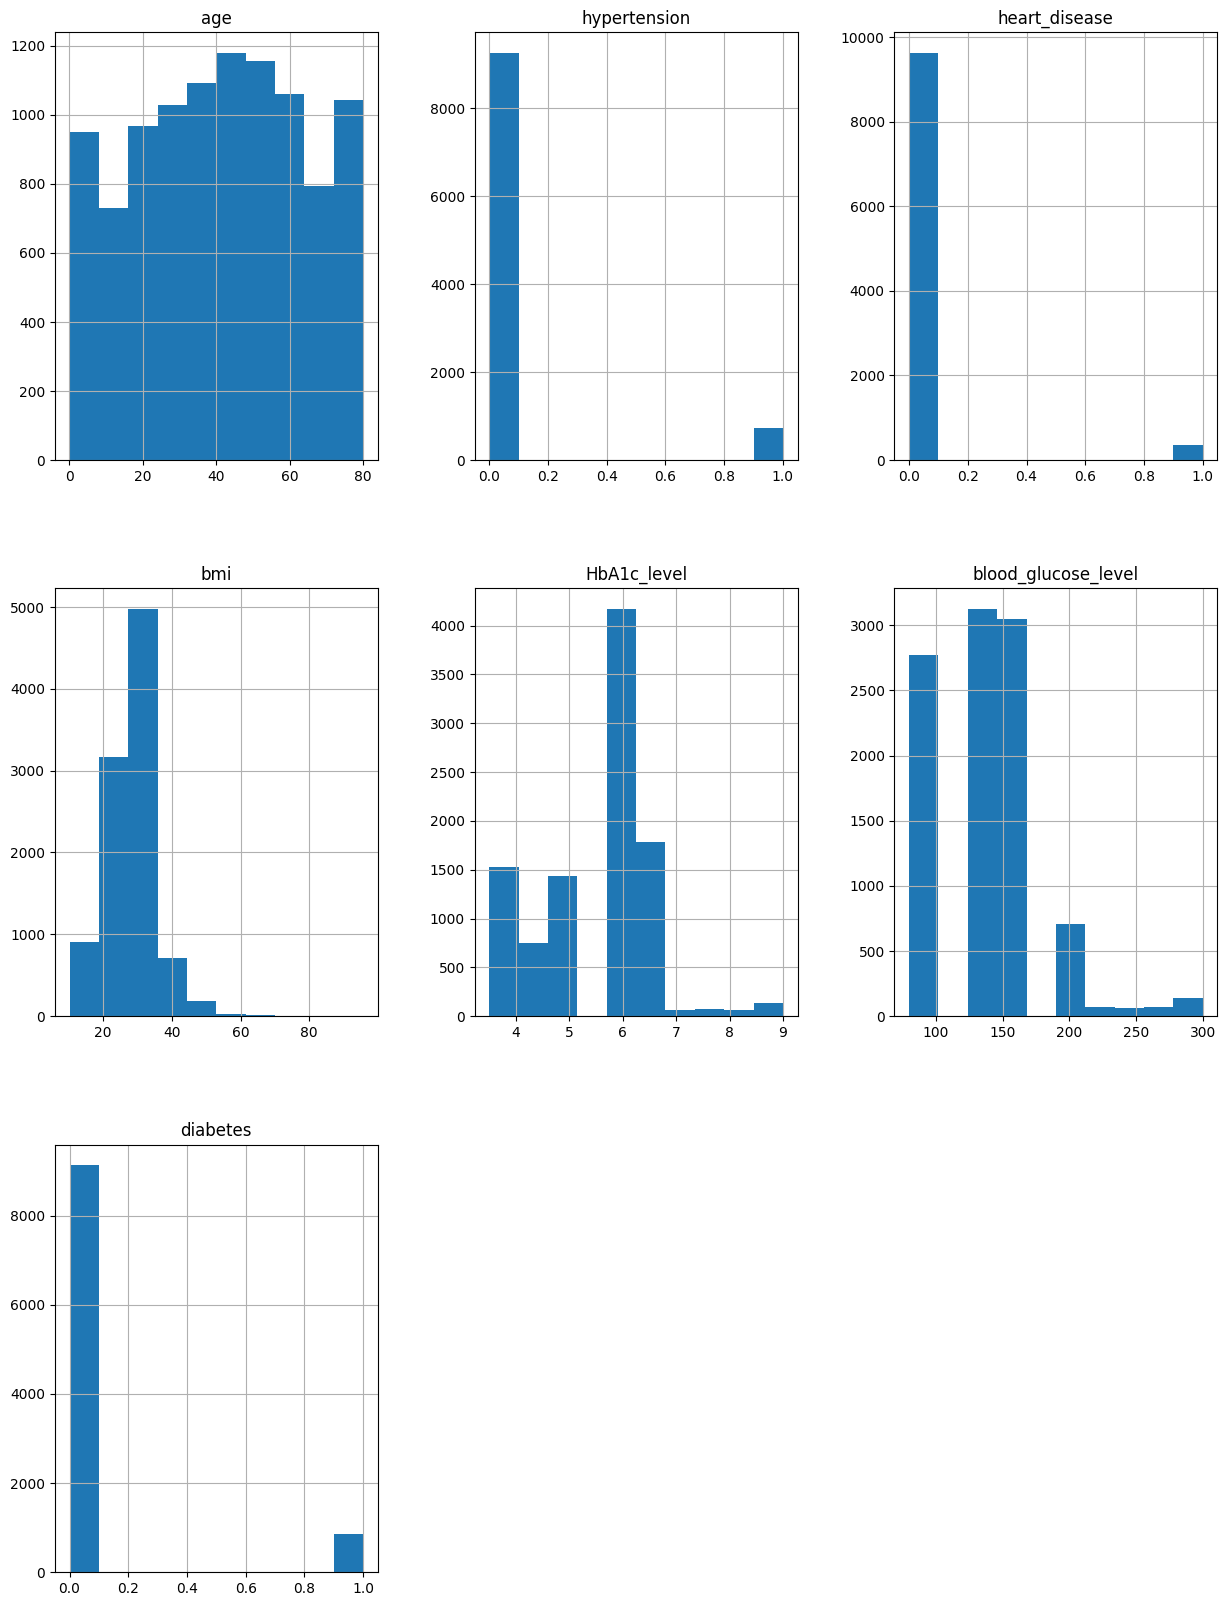

In [8]:
fig, ax = plt.subplots(figsize=(15,20))
df.hist(ax=ax)
plt.show()

In [9]:
counts

diabetes
0    9137
1     863
Name: count, dtype: int64

In [10]:
df['gender_numeric'] = df['gender'].replace({'Male': 0, 'Female': 1})
df

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_16889/1602800546.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender_numeric'] = df['gender'].replace({'Male': 0, 'Female': 1})


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_numeric
75721,Female,13.0,0,0,No Info,20.82,5.8,126,0,1
80184,Female,3.0,0,0,No Info,21.00,5.0,145,0,1
19864,Male,63.0,0,0,former,25.32,3.5,200,0,0
76699,Female,2.0,0,0,never,17.43,6.1,126,0,1
92991,Female,33.0,0,0,not current,40.08,6.2,200,1,1
...,...,...,...,...,...,...,...,...,...,...
5002,Male,62.0,0,0,never,37.02,7.5,200,1,0
30151,Female,80.0,0,0,never,24.71,6.6,126,0,1
93194,Female,11.0,0,0,No Info,22.89,3.5,85,0,1
73199,Female,62.0,0,0,never,22.58,5.7,155,0,1


In [11]:
df = df[df['gender_numeric'] != 'Other']

In [12]:
df['gender_numeric'].value_counts()

gender_numeric
1    5919
0    4081
Name: count, dtype: int64

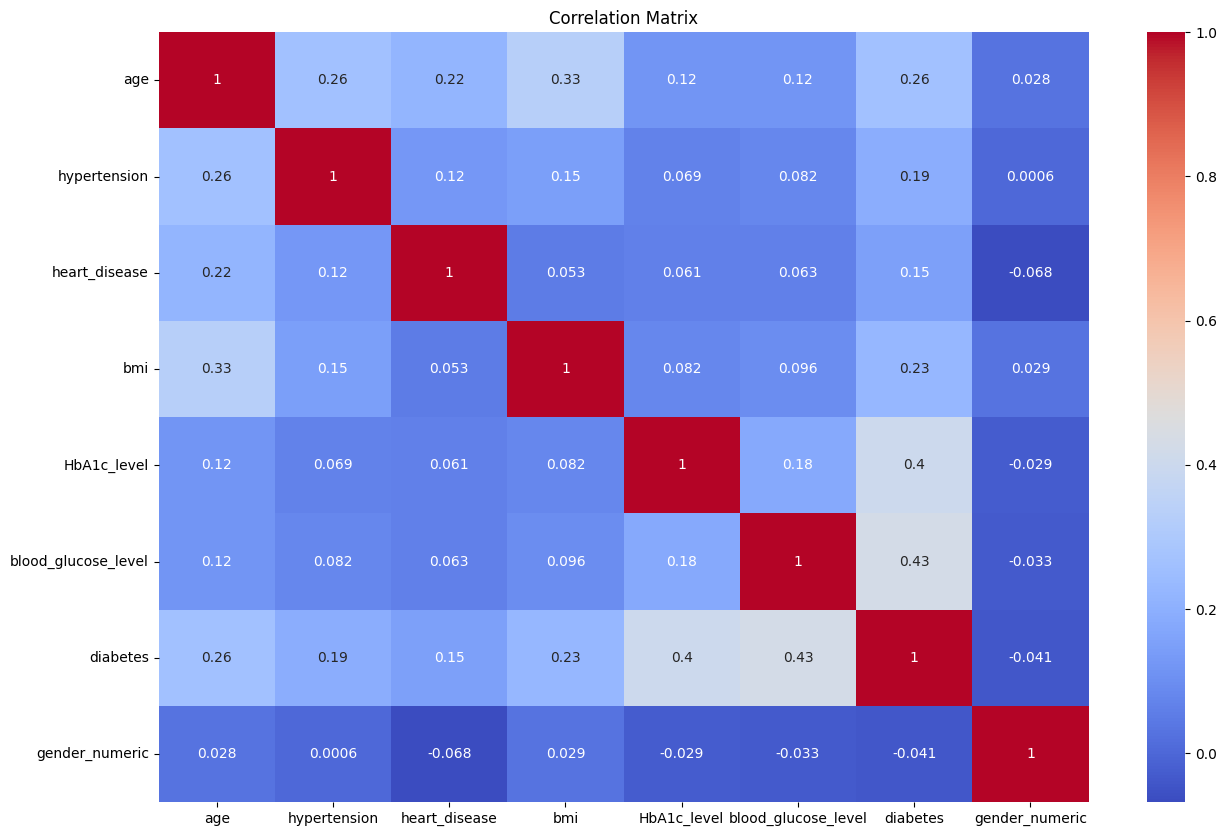

In [13]:
df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# df_sampled = df.sample(frac=0.1, random_state=42)

### Con cajas negras

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
X = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_numeric']]
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.95
Matriz de confusión:
[[1804   19]
 [  71  106]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1823
           1       0.85      0.60      0.70       177

    accuracy                           0.95      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.95      0.95      0.95      2000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
